<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cnn은 이미지를 다룰 때 좋은 성능을 보임.
컨벌루셔널.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten   #이미지를 한줄로 쭉 28*28개의 형태로 차원축소하는 reshape 해주는 게 Flatten.
from tensorflow.keras import datasets
from keras.utils import np_utils

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)   #학습용 6만개
print(X_test.shape, Y_test.shape)   #검증용 만개로 애초에 잘려있음


#얘도 28x28임.

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

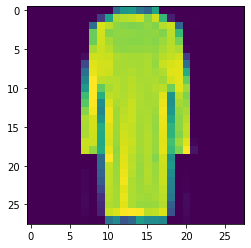

3
[[  0   0   0   0   0   0   0   0   0   0   0  91 133 138 101  83 149   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 147 223 227 231 237 209 235 171
   21   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  94 240 229 212 208 206 208 213 207 227
  235  85   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 197 238 208 212 213 212 210 211 213 207
  230 172   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 198 237 221 211 211 210 210 212 209 217
  227 202   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 222 235 228 214 212 214 214 215 214 222
  229 223   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8 237 236 235 224 222 221 221 223 217 228
  232 237  47   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  57 243 238 238 222 222 222 221 224 215 234
  240 243  93   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  93 246 238 236 222 223 225 222 

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample])   #원래모노칼라임. 단색만 가짐. 0~255까지 검정 흰색 사이의 범위.  camp='gray'넣으면 원본.
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [ ]:
y_train = np_utils.to_categorical(Y_train)  #이러면 원핫인코딩 됨.
y_test= np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## 여기부터 달라짐. 
## reshape 안 하고 이미지 그대로 간다

In [ ]:
x_train = X_train/255    #민맥스 스케일링만 함.
x_test = X_test/ 255

#스케일링 하고 리셰입하는데, 이미지 그대로 들어가야함. 이미지 하나당 한개로 묶어야함.
x_train= x_train.reshape(60000, 28, 28, 1)
print(x_train.shape)
x_test= x_test.reshape(10000, 28,28,1)
print(x_test.shape)
print(x_train[0])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        

In [ ]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))#컨볼루션 레이어를 추가해야함.
model.add(MaxPool2D(padding='same', pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))#컨볼루션 레이어를 추가해야함.
model.add(MaxPool2D(padding='same', pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
fit_hist = model.fit(x_train, y_train, batch_size= 128, epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
375/375 [==============================] - 44s 115ms/step - loss: 0.5606 - accuracy: 0.7970 - val_loss: 0.3770 - val_accuracy: 0.8658
Epoch 2/15
375/375 [==============================] - 42s 112ms/step - loss: 0.3453 - accuracy: 0.8755 - val_loss: 0.3312 - val_accuracy: 0.8818
Epoch 3/15
375/375 [==============================] - 42s 113ms/step - loss: 0.2969 - accuracy: 0.8926 - val_loss: 0.2958 - val_accuracy: 0.8933
Epoch 4/15
375/375 [==============================] - 42s 112ms/step - loss: 0.2640 - accuracy: 0.9026 - val_loss: 0.2722 - val_accuracy: 0.9029
Epoch 5/15
375/375 [==============================] - 42s 111ms/step - loss: 0.2411 - accuracy: 0.9102 - val_loss: 0.2578 - val_accuracy: 0.9051
Epoch 6/15
375/375 [==============================] - 42s 111ms/step - loss: 0.2203 - accuracy: 0.9195 - val_loss: 0.2516 - val_accuracy: 0.9057
Epoch 7/15
375/375 [==============================] - 42s 112ms/step - loss: 0.2035 - accuracy: 0.9242 - val_loss: 0.2336 - val_ac

In [ ]:
# 검증해보자

score= model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.9136000275611877


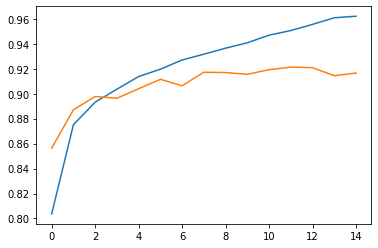

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

sandal
5
[[1.9296378e-07 3.6306020e-08 5.6493877e-07 1.6658854e-09 8.4601201e-11
  9.9998534e-01 6.5150463e-10 1.2601818e-06 1.2537333e-05 1.3733028e-09]]
5
sandal


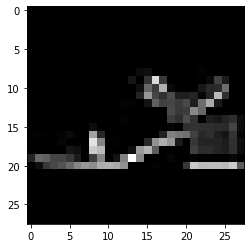

In [ ]:
my_sample=np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')  #입력값
print(label[Y_test[my_sample]])
print(Y_test[my_sample])    #정답
pred= model.predict(x_test[my_sample].reshape(-1, 28, 28, 1)) #입력값으로 예측한 값
print(pred)
print(np.argmax(pred))
print(label[np.argmax(pred)])

In [ ]:


# 지금까지 한 건 그냥 NN. neural network.
#굳이 하나 더 붙이자면 dnn. dense neural network. 조밀하게 연결되어있는.  (용어 맞아? ,,,)

#앞으로 할 거는 cnn. convolutional(합성곱) nueral network. 이미지 분류에 특화됨.